<a href="https://colab.research.google.com/github/harryguiacorn/colab/blob/main/Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas matplotlib mplfinance

# Monthly Seasonality

[*********************100%%**********************]  1 of 1 completed


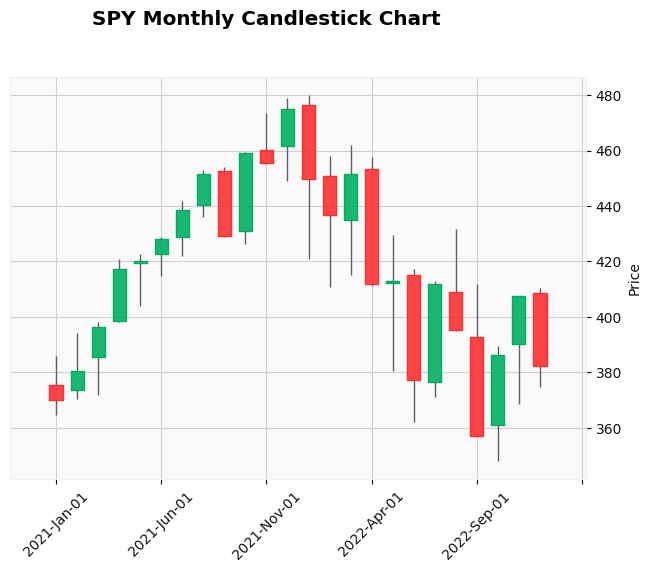

<Figure size 1000x600 with 0 Axes>

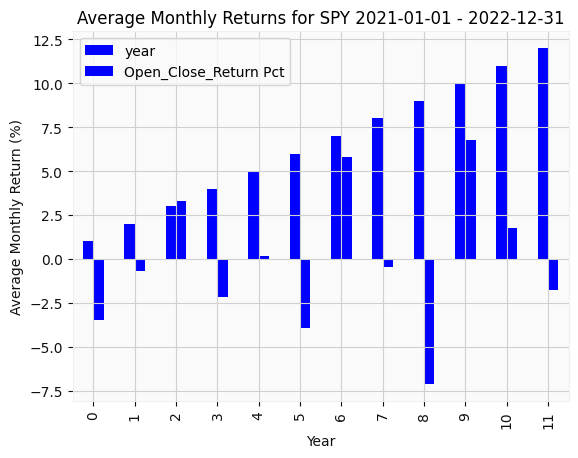

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for the stock or ETF you want to analyze (e.g., SPY)
ticker_symbol = "SPY"

# Define the date range for the historical data
start_date = "2021-01-01"
end_date = "2022-12-31"

# Download the monthly historical data for SPY
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")

# Calculate the monthly difference between open and close prices
spy_data['Open_Close_Difference'] = spy_data['Close'] - spy_data['Open']

# Calculate the monthly returns (percentage change) between open and close prices
spy_data['Open_Close_Return Pct'] = (spy_data['Close'] - spy_data['Open']) / spy_data['Open'] * 100

spy_data.to_csv(f"{ticker_symbol} Monthly Candlestick Chart.csv")
# print(spy_data)

# Group the data by year and calculate the average of monthly returns for each year
grouped_data = spy_data.groupby(spy_data.index.month)['Open_Close_Return Pct'].mean()

# Rename the 'date' column to 'month'
grouped_data = grouped_data.reset_index().rename(columns={'Date': 'Month'})

grouped_data.to_csv(f"{ticker_symbol} Monthly Average.csv")
# print(grouped_data)

# Plot the candlestick chart for the monthly data
mpf.plot(spy_data, type='candle', title=f"{ticker_symbol} Monthly Candlestick Chart", style='yahoo')

# Create a bar plot of the average monthly returns by year
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.title(f'Average Monthly Returns for {ticker_symbol} {start_date} - {end_date}')
plt.xlabel('Year')
plt.ylabel('Average Monthly Return (%)')
plt.show()

[*********************100%%**********************]  1 of 1 completed


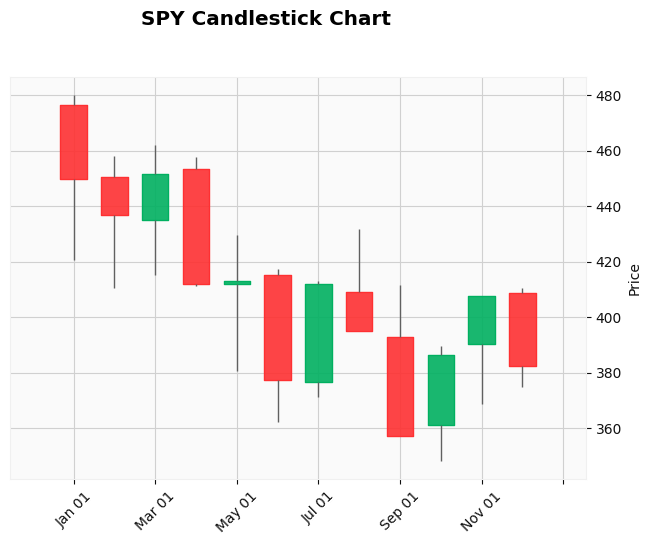

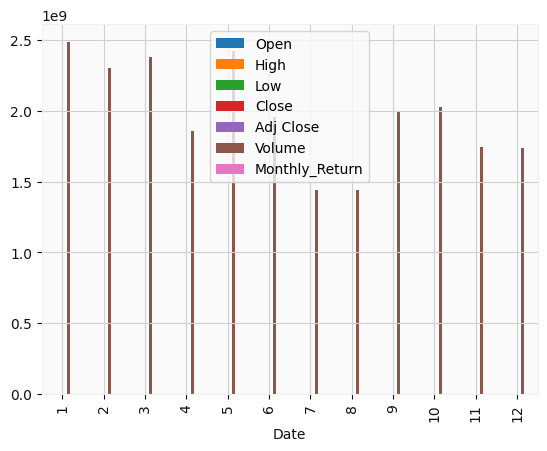

In [17]:
import yfinance as yf
import mplfinance as mpf

# Define the ticker symbol for the stock or ETF you want to plot (e.g., SPY)
ticker_symbol = "SPY"

# Define the date range for the historical data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")
# Calculate monthly returns
data['Monthly_Return'] = data['Adj Close'].pct_change()

data.to_csv("spy_monthly.csv")

# Convert the historical data to a format suitable for candlestick charting
ohlc_data = data[["Open", "High", "Low", "Close", "Volume"]]

# Plot the candlestick chart
mpf.plot(ohlc_data, type="candle", title=f"{ticker_symbol} Candlestick Chart", style="yahoo")

# Calculate monthly means
monthly_means = data.groupby(data.index.month).mean()

# Plot seasonality
data.groupby(data.index.month).mean().plot(kind="bar")

# Export data to CSV file
monthly_means.to_csv("seasonality_data.csv")




# Method 1

[*********************100%%**********************]  1 of 1 completed


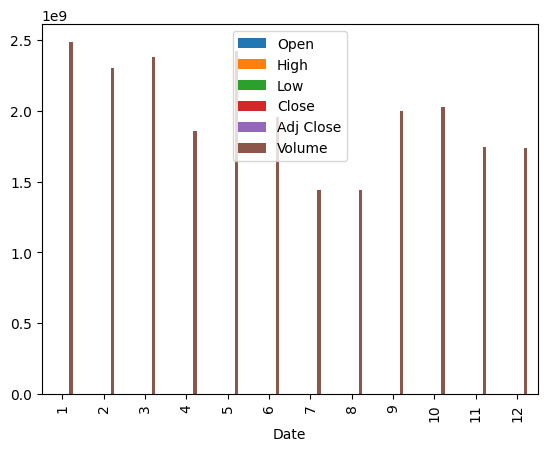

In [8]:
import yfinance as yf

# Download data for the past 5 years
start_date = '2022-01-01'
end_date = '2022-12-31'
ticker_symbol = "SPY"

# Fetch SPY data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1mo")

data.to_csv("SPY_5y_daily.csv")

# Calculate monthly means
monthly_means = data.groupby(data.index.month).mean()

# Plot seasonality
data.groupby(data.index.month).mean().plot(kind="bar")

# Export data to CSV file
monthly_means.to_csv("seasonality_data.csv")


# Method 2

In [ ]:
pip install yfinance pandas matplotlib


[*********************100%%**********************]  1 of 1 completed


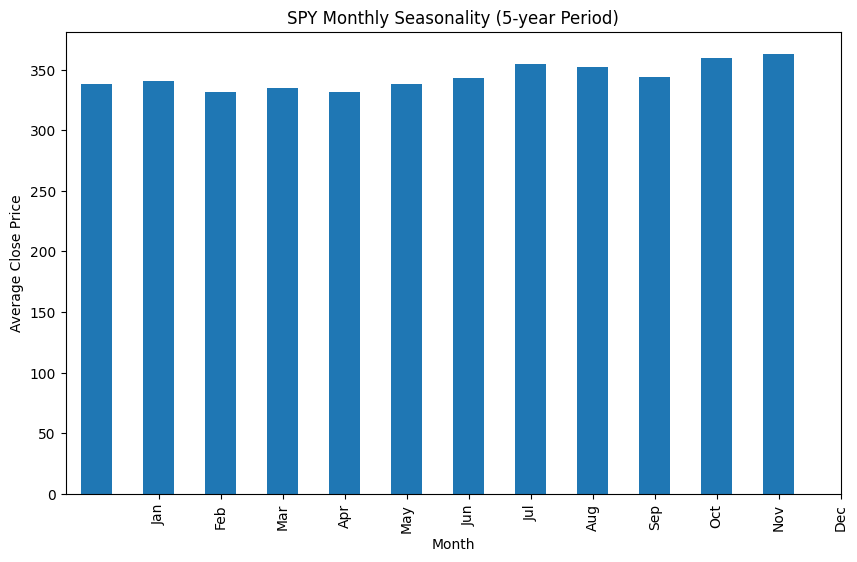

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for SPY
ticker_symbol = "SPY"

# Define the start and end dates for the past 5 years
start_date = '2018-01-01'
end_date = '2022-12-31'

# Fetch SPY data using yfinance
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a DataFrame with a date column and a month column
spy_data['Date'] = spy_data.index
spy_data['Month'] = spy_data['Date'].dt.month

# Group the data by month and calculate the average for each month
monthly_seasonality = spy_data.groupby('Month')['Close'].mean()

# Plot the seasonality data
plt.figure(figsize=(10, 6))
monthly_seasonality.plot(kind='bar', x='Month', y='Close', legend=False)
plt.title("SPY Monthly Seasonality (5-year Period)")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Save the SPY data to a CSV file
spy_data.to_csv('spy_data.csv')


[*********************100%%**********************]  1 of 1 completed


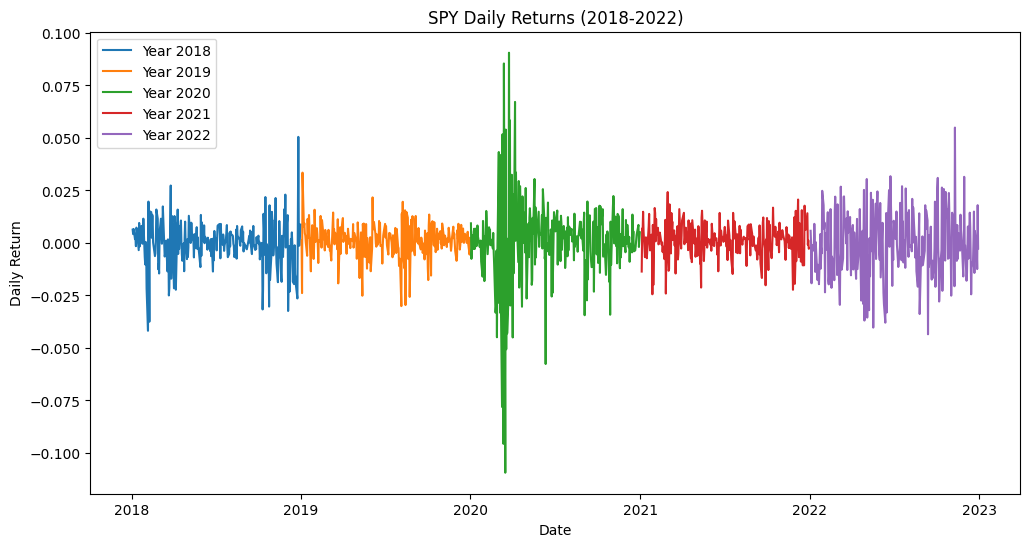

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the start and end dates for the 5-year period
start_date = "2018-01-01"
end_date = "2022-12-31"

# Ticker symbol for SPY
ticker = "SPY"

# Download the data from Yahoo Finance
spy_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
spy_data['Daily_Return'] = spy_data['Adj Close'].pct_change()

# Save the daily return data to a CSV file
spy_data.to_csv('spy_daily_returns.csv')

# Group data by year
yearly_data = spy_data.groupby(spy_data.index.year)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot daily returns for each year
for year, data in yearly_data:
    ax.plot(data.index, data['Daily_Return'], label=f"Year {year}")

# Add labels and legend
ax.set_title(f"{ticker} Daily Returns (2018-2022)")
ax.set_xlabel("Date")
ax.set_ylabel("Daily Return")
ax.legend()

# Save the plot to a file
plt.savefig("spy_daily_returns.png")

# Show the plot
plt.show()
